In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
auto=pd.read_excel('auto_acp.xlsx',index_col=0)
auto.index.name=None
auto

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180
Toyota Corolla,1166,55,399,157,815,140


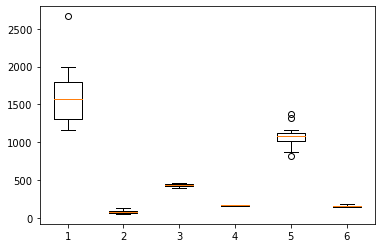

In [3]:
plt.boxplot(auto)
plt.show()

In [4]:
scaler=StandardScaler()
auto_scaled=scaler.fit_transform(auto)
autos=pd.DataFrame(auto_scaled)
auto_scaled

array([[-0.77509889, -0.28335818, -1.88508077, -1.09734528, -1.56900676,
         0.56976043],
       [-0.12016326,  0.01963869,  1.60580955,  2.0010414 ,  0.23416142,
         0.14597168],
       [-0.92920139, -0.83885242, -0.44217944,  0.25819889, -0.21663062,
        -0.53209032],
       [-1.12733318, -1.29334771, -1.00072189, -1.09734528, -1.11821472,
        -0.61684807],
       [-0.12841875,  0.67613189,  0.25599862, -0.51639778,  0.19659542,
         0.56976043],
       [-0.9209459 , -0.13185975, -0.20945342,  0.45184806,  0.0087654 ,
         0.14597168],
       [ 0.45221746, -0.28335818,  0.72145067,  0.45184806,  0.60982146,
        -0.36257482],
       [-0.18345536, -1.49534562, -0.44217944, -0.71004695, -0.51715865,
        -1.54918332],
       [ 2.84080623,  2.19111619,  0.86108628,  1.22644473,  1.81193359,
         1.84112668],
       [-1.28143568, -1.49534562, -1.60580955, -1.87194195, -1.98223281,
        -1.54918332],
       [-0.16969621,  1.23162613, -0.25599862, -0.

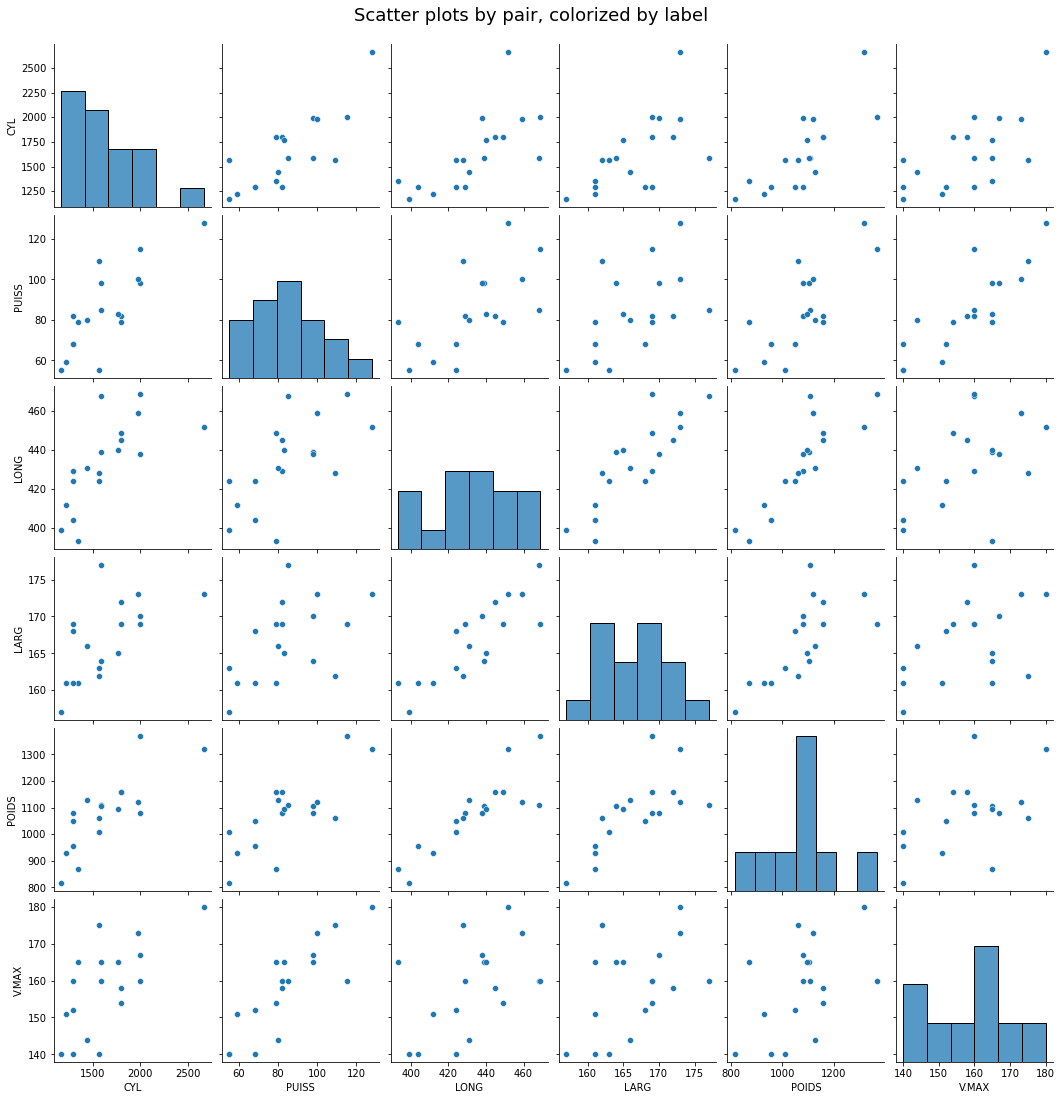

In [5]:
g = sns.pairplot(auto)
plt.suptitle('Scatter plots by pair, colorized by label', fontsize=18, y=1.02);

In [6]:
pca=PCA()
coords=pca.fit_transform(auto_scaled)
coords
comp=pca.components_

In [7]:
pca.explained_variance_ratio_

array([0.73680968, 0.14267705, 0.06217768, 0.03565368, 0.01546687,
       0.00721505])

In [8]:
p=auto.shape[1]
n=auto.shape[0]
eigenvalues = (n-1)/n*pca.explained_variance_
eigenvalues

array([4.42085806, 0.85606229, 0.37306608, 0.21392209, 0.09280121,
       0.04329027])

Text(0.5, 1.0, 'Les valeurs propes en fonction des facteurs')

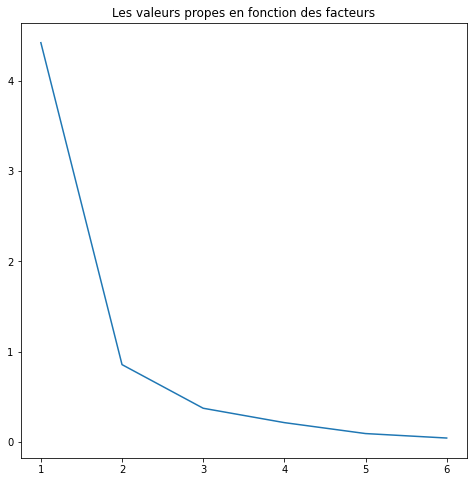

In [9]:
fig,axes=plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(range(1,p+1),eigenvalues)
plt.title("Les valeurs propes en fonction des facteurs")

Text(0.5, 1.0, 'cumul de la variance expliquée vs nombre de facteurs')

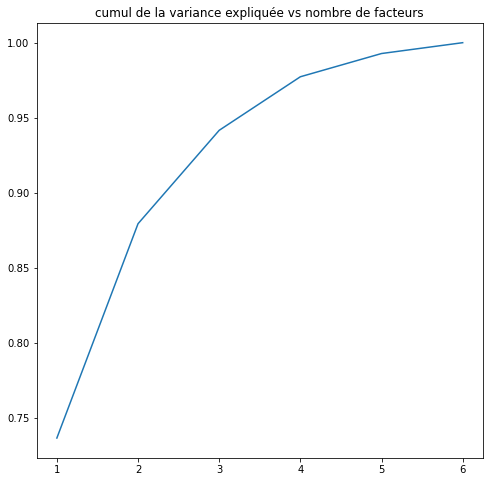

In [10]:
fig,axes=plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(range(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("cumul de la variance expliquée vs nombre de facteurs")

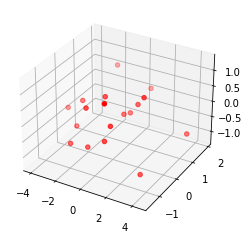

In [11]:
ax=plt.axes(projection="3d")
ax.scatter3D(coords[0:,0],coords[0:,1],coords[0:,2], color ="red")

In [12]:
b_i =1/np.arange(p,0 ,-1) 
cumul_b_i = np.cumsum(b_i) 
cumul_b_i = cumul_b_i[::-1]
pd.DataFrame({'Val.Prope' :eigenvalues, 'Seuils':cumul_b_i})

,Val.Prope,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


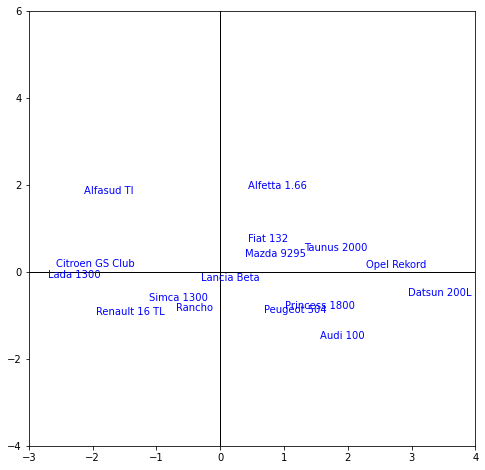

In [13]:
fig, axes = plt.subplots(figsize=(8 , 8))
axes.set_xlim(-3,4)
axes.set_ylim(-4 , 6)
plt.plot([-3 , 4],[0,0],color='black',linewidth=1)
plt.plot([0,0],[ -4,6 ],color= 'black',linewidth= 1)

for i in range(n):
    plt.annotate(auto.index[i],(coords[i, 0],coords[i,1 ]),color='b')


In [14]:
total_dist = np.sum(auto_scaled **2,axis= 1)
cos2=coords**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/total_dist
pd.DataFrame({'Modèle':auto.index, 'COS2_1':cos2[:,0 ],'COS2_2':cos2[:,1 ], 'COS2_3':cos2[:,2 ]})

,Modèle,COS2_1,COS2_2,COS2_3
0,Alfasud TI,0.556218,0.387670,0.039759
1,Audi 100,0.365334,0.349406,0.259215
2,Simca 1300,0.580284,0.210694,0.096545
3,Citroen GS Club,0.976992,0.001879,0.003256
4,Fiat 132,0.156579,0.413826,0.031955
5,Lancia Beta,0.081555,0.033900,0.402405
6,Peugeot 504,0.309202,0.575488,0.043600
7,Renault 16 TL,0.673539,0.170535,0.068101
8,Renault 30,0.892431,0.051920,0.016167
9,Toyota Corolla,0.975219,0.003426,0.005641


In [15]:
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
ctr = coords**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigenvalues[j])
mode=pd.DataFrame({'id':auto.index,'CTR_1' :ctr[:, 0],'CTR_2':ctr[:, 1],'CTR_3' :ctr[:, 2]})


In [17]:
sqrt_eigenvalues = np.sqrt(eigenvalues) 
corvar = np.zeros((p,p))
for i in range(p):
    corvar[:,i]= pca.components_[i,:] * sqrt_eigenvalues[i]

#len(corvar)

In [18]:
pd.DataFrame({'id' :auto.columns,'COR_1' :corvar[:, 0],'COR_2' :corvar[:, 1],'COR_3' :corvar[:, 2]})


,id,COR_1,COR_2,COR_3
0,CYL,0.893464,0.114906,-0.215983
1,PUISS,0.886858,0.384689,-0.112948
2,LONG,0.886155,-0.381029,0.041310
3,LARG,0.813536,-0.412736,0.369448
4,POIDS,0.905187,-0.224532,-0.295865
5,V.MAX,0.754710,0.573519,0.296522


Text(0.5, 1.0, 'cercle de correlations')

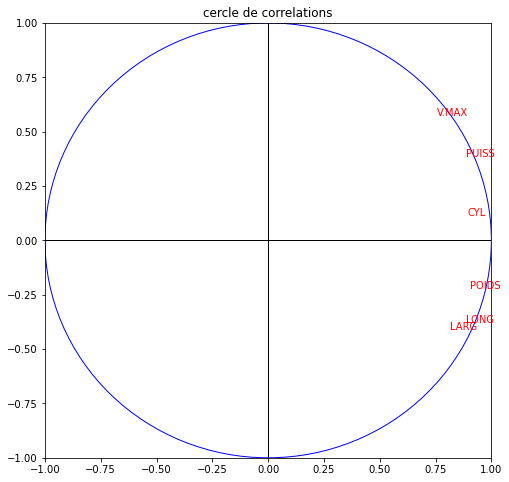

In [19]:
fig, axes = plt.subplots(figsize=(8 ,8 ))
axes.set_xlim(-1 ,1 )
axes.set_ylim(-1 ,1 )

for j in range(p):
    plt.annotate(auto.columns[j],(corvar[j,0],corvar[j,1]),color='r')

plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)
circle = plt.Circle((0,0),1,color='blue' ,fill=False)
axes.add_artist(circle)
plt.title("cercle de correlations" )

In [20]:
cos2_var = corvar**2
pd.DataFrame({'id':auto.columns,'COS_1':cos2_var[:,0 ],'COS_2':cos2_var[:, 1], 'COS_3':cos2_var[:, 2]})

,id,COS_1,COS_2,COS_3
0,CYL,0.798277,0.013203,0.046649
1,PUISS,0.786517,0.147986,0.012757
2,LONG,0.785270,0.145183,0.001707
3,LARG,0.661841,0.170351,0.136492
4,POIDS,0.819364,0.050415,0.087536
5,V.MAX,0.569588,0.328925,0.087925


In [21]:
ctrvar = cos2_var
for i in range(p):
    ctrvar[:,i] = ctrvar[:,i]/eigenvalues[i]
pd.DataFrame({'id':auto.columns,'CTR_1':ctrvar[:,0] ,'CTR_2':ctrvar[:,1 ],'CTR_3' :ctrvar[:, 2],'CTR_4' :ctrvar[:, 3]})

,id,CTR_1,CTR_2,CTR_3,CTR_4
0,CYL,0.180571,0.015423,0.125042,0.652519
1,PUISS,0.177911,0.172868,0.034196,0.128015
2,LONG,0.177628,0.169594,0.004574,0.078261
3,LARG,0.149709,0.198994,0.365865,0.044762
4,POIDS,0.185341,0.058892,0.234639,0.091030
5,V.MAX,0.128841,0.384230,0.235683,0.005413


In [22]:
auto_ind=pd.read_excel('auto_acp_ind_illustrative.xlsx',index_col=0)
auto_ind.index.name=None
auto_ind

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


In [23]:
auto_ind=pd.read_excel('autos.xlsx',index_col=0)
auto_ind.index.name=None
# auto_ind

In [24]:
scaler=StandardScaler()
auto_ind_scaled=scaler.fit_transform(auto_ind)
#auto_ind_scaled

In [131]:
comp1=[]
comp2=[]
for l in range(len(comp)):
    comp1.append(np.dot(auto_ind_scaled[-2],comp[l]))
    comp2.append(np.dot(auto_ind_scaled[-1],comp[l]))
coord_new=[]
coord_new.append(comp1)
coord_new.append(comp2)
# print(comp1)
# print(comp2)
print(coord_new)

[[4.86733296538182, 0.2792009444364214, -0.2886292056575168, 0.2527852571302893, -0.2580470551275401, -0.04700067972865152], [-2.125878346594031, 1.0710459479157963, -0.06785779843201378, -0.2775259108445254, 0.5211040022253982, 0.12791011928689894]]


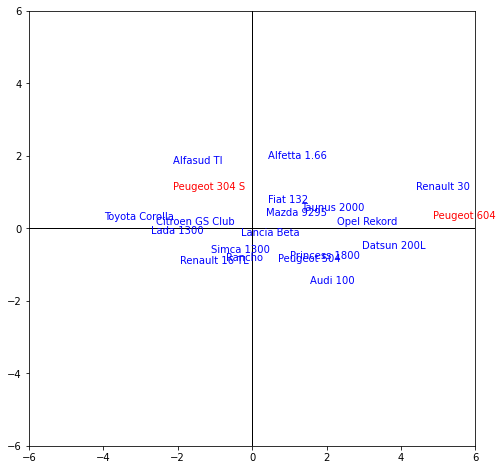

In [115]:
fig, axes = plt.subplots(figsize=(8 , 8))
axes.set_xlim(-6,6)
axes.set_ylim(- 6,6)
for i in range(n):
    plt.annotate(auto.index[i],(coords[i,0 ],coords[i,1 ]),color='b')
    
plt.annotate(auto_ind.index[n],(coord_new[0][0],coord_new[0][1]),color='r' )
plt.annotate(auto_ind.index[n+1],(coord_new[1][0],coord_new[1][1]),color='r' )



# Variables suplémentaires

In [57]:
auto_var=pd.read_excel('aut.xlsx',index_col=0)
auto_var.index.name=None
var_sup=[auto_var['PRIX'].to_numpy(),auto_var['R.POID.PUIS'].to_numpy()]
var_sup=[[30570, 39990, 29600, 28250, 34900, 35480, 32300, 32000, 47700,
        26540, 42395, 33990, 43980, 35010, 39450, 27900, 32700, 22100],[11.01265823, 13.05882353, 15.44117647, 15.76271186, 11.2755102 ,
        13.17073171, 14.6835443 , 18.36363636, 10.3125    , 14.81818182,
         9.72477064, 14.14634146, 11.91304348, 11.02040816, 14.1125    ,
        13.19277108, 11.2, 14.04411765]]
#var_sup


In [58]:
# recupération de la premiere coordonnée de chaque individu sur les axes deux premmiers axes
F1=[]
F2=[]
for i in range(n):
    F1.append(coords[i][0])
    F2.append(coords[i][1])
# print(F1)


In [117]:
# correlation
comp1=[]
comp1.append(np.corrcoef(var_sup[0],F1)[0][1])
comp1.append(np.corrcoef(var_sup[1],F1)[0][1])
comp2=[]
comp2.append(np.corrcoef(var_sup[0],F2)[0][1])
comp2.append(np.corrcoef(var_sup[1],F2)[0][1])
ind=['PRIX','R.POID.PUIS']
composante=pd.DataFrame({'corr':ind,'comp1':comp1,'comp2':comp2})
composante

,corr,comp1,comp2
0,PRIX,0.772475,0.086708
1,R.POID.PUIS,-0.589039,-0.672545


Text(0.5, 1.0, 'cercle de correlations')

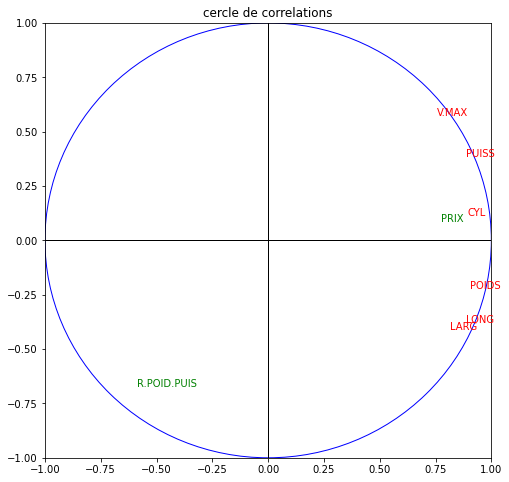

In [61]:
fig, axes = plt.subplots(figsize=(8 ,8 ))
axes.set_xlim(-1 ,1 )
axes.set_ylim(-1 ,1 )

for j in range(p):
    plt.annotate(auto.columns[j],(corvar[j,0],corvar[j,1]),color='r')

plt.annotate(auto_var.columns[1],(comp1[0],comp2[0]),color='green')
plt.annotate(auto_var.columns[2],(comp1[1],comp2[1]),color='green')
plt.plot([-1,1],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linewidth=1)
circle = plt.Circle((0,0),1,color='blue' ,fill=False)
axes.add_artist(circle)
plt.title("cercle de correlations" )

In [119]:
# significativiéte
sig1=[]
sig1.append(round((n-3)**(1/2)*np.log((1+comp1[0])/(1-comp1[0]))/2,3))
sig1.append(round((n-3)**(1/2)*np.log((1+comp1[1])/(1-comp1[1]))/2,3))
sig2=[]
sig2.append(round((n-3)**(1/2)*np.log((1+comp2[0])/(1-comp2[0]))/2,3))
sig2.append(round((n-3)**(1/2)*np.log((1+comp2[1])/(1-comp2[1]))/2,3))
signif=pd.DataFrame({'sig':ind,'comp1':sig1,'comp2':sig2})
signif

,sig,comp1,comp2
0,PRIX,3.975,0.337
1,R.POID.PUIS,-2.619,-3.158


In [69]:
# variable qualitative
pd.DataFrame(auto_var[['FINITION']].value_counts())

,0
FINITION,
2_B,7
3_TB,6
1_M,5


In [85]:
Fini=auto_var['FINITION'].to_list()
M1=[F1[x] for x in range(len(Fini)) if Fini[x]=="1_M"]
M2=[F2[x] for x in range(len(Fini)) if Fini[x]=="1_M"]
TB1=[F1[x] for x in range(len(Fini)) if Fini[x]=="3_TB"]
TB2=[F2[x] for x in range(len(Fini)) if Fini[x]=="3_TB"]
B1=[F1[x] for x in range(len(Fini)) if Fini[x]=="2_B"]
B2=[F2[x] for x in range(len(Fini)) if Fini[x]=="2_B"]
    

In [123]:
MOY1=[round(np.sum(M1)/len(M1),4),round(np.sum(B1)/len(B1),4),round(np.sum(TB1)/len(TB1),4)]
MOY2=[round(np.sum(M2)/len(M2),4),round(np.sum(B2)/len(B2),4),round(np.sum(TB2)/len(TB2),4)]
print(MOY1)
print(MOY2)

[-2.0004, 0.2353, 1.3924]
[-0.0226, 0.0453, -0.034]


In [124]:
ng=[len(M1),len(B1),len(TB1)]
ng

[5, 7, 6]

In [125]:
Finition=["1_M","2_B","3_TB"]
Finition


['1_M', '2_B', '3_TB']

In [126]:
stat1=[]
stat2=[]

stat1.append(round(MOY1[0]/(((n-len(M1))*eigenvalues[0]/((n-1)*len(M1)))**(1/2)),2))
stat2.append(round(MOY2[0]/(((n-len(M1))*eigenvalues[0]/((n-1)*len(M1)))**(1/2)),2))
stat1.append(round(MOY1[1]/(((n-len(B1))*eigenvalues[0]/((n-1)*len(B1)))**(1/2)),2))
stat2.append(round(MOY2[1]/(((n-len(B1))*eigenvalues[0]/((n-1)*len(B1)))**(1/2)),2))
stat1.append(round(MOY1[2]/(((n-len(TB1))*eigenvalues[0]/((n-1)*len(TB1)))**(1/2)),2))
stat2.append(round(MOY2[2]/(((n-len(TB1))*eigenvalues[0]/((n-1)*len(TB1)))**(1/2)),2))

stat1
#stat2

[-2.43, 0.37, 1.93]

In [129]:
var_finition=pd.DataFrame({'Finition':Finition,'ng':ng,'moyenne1':MOY1,'v_test1':stat1,'moyenne2':MOY2,'v_test2':stat2})
var_finition

,Finition,ng,moyenne1,v_test1,moyenne2,v_test2
0,1_M,5,-2.0004,-2.43,-0.0226,-0.03
1,2_B,7,0.2353,0.37,0.0453,0.07
2,3_TB,6,1.3924,1.93,-0.0340,-0.05


In [111]:
indi=['M','B','TB']

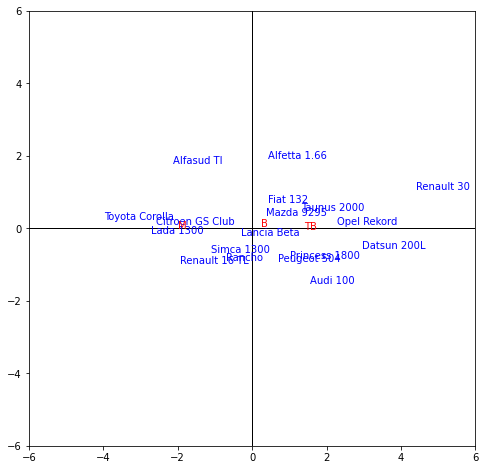

In [130]:
fig, axes = plt.subplots(figsize=(8 , 8))
axes.set_xlim(-6,6)
axes.set_ylim(- 6,6)
for i in range(n):
    plt.annotate(auto.index[i],(coords[i,0 ],coords[i,1 ]),color='b')
    
plt.annotate(indi[0],(MOY1[0],MOY2[0]),color='r' )
plt.annotate(indi[1],(MOY1[1],MOY2[1]),color='r' )
plt.annotate(indi[2],(MOY1[2],MOY2[2]),color='r' )
plt.plot([-6,6],[0 ,0 ],color='black' ,linewidth= 1)
plt.plot([0 ,0 ],[ -6, 6],color='black' ,linewidth= 1 )